# Determination of the expected displacement [%]
### Johanna Rahm, Sebastian Malkusch
#### Research group Heilemann
#### Institute for Physical and Theoretical Chemistry, Goethe University Frankfurt a.M.
The estimated percentage of false positives among all localizations [%]. Swift uses this value in
combination with the intensity of a localization (if it is available) to determine its individual
likelihood to be noise. The number of localizations per px² and frame is determined and averaged for the background measurements. The number of localizations per px² and frame is determined for the cell measurements. The expected noise rate is calculated by dividing the background average density with the individual cell density multiplyied by 100.

## Choose a localization software


In [1]:
from pySPT.widgets import widgetExpNoiseRate
from pySPT.widgets import widgetDirectoryStructure
from pySPT.widgets import widgetColumnSort
from pySPT.preAnalysis import expNoiseRate
widget_exp_noise_rate = widgetExpNoiseRate.WidgetExpNoiseRate()
display(widget_exp_noise_rate.software_button)

RadioButtons(options=('ThunderSTORM', 'rapidSTORM'), value='ThunderSTORM')

## Load files
### Define a cell directory
Define a directory of localized cell measurements (Example path: F:\data_folder). All files with fitting ending (.txt or .csv and no "tracked" in file name) will be loaded.

In [2]:
widget_dir_structure = widgetDirectoryStructure.WidgetDirStructure()
display(widget_exp_noise_rate.dir_box, widget_exp_noise_rate.dir_button)
widget_exp_noise_rate.dir_button.on_click(widget_exp_noise_rate.open_dir)
widget_exp_noise_rate.dir_box.observe(widget_exp_noise_rate.change_dir_box)

Text(value='', description='Directory', placeholder='directory to be searched in', style=DescriptionStyle(desc…

Button(description='browse', style=ButtonStyle(), tooltip='browse for directory')

### Define a background directory
Define a directory of localized background measurements. All files with fitting ending (.txt or .csv and no "tracked" in file name) will be loaded.

In [3]:
display(widget_exp_noise_rate.dir_box_bg, widget_exp_noise_rate.dir_button_bg)
widget_exp_noise_rate.dir_button_bg.on_click(widget_exp_noise_rate.open_dir_bg)
widget_exp_noise_rate.dir_box_bg.observe(widget_exp_noise_rate.change_dir_box_bg)

Text(value='', description='Directory', placeholder='directory to be searched in', style=DescriptionStyle(desc…

Button(description='browse', style=ButtonStyle(), tooltip='browse for directory')

## Areas
### Cell sizes
Choose/insert the complete directory for the roi.log file which contains the cell sizes (e.g. F:\data_folder\roi.log). The file name of the cell with no .* ending is compared with the roi entries with no .* ending. The last fitting entry is taken as the cell size. 

In [4]:
display(widget_exp_noise_rate.roi_text_box, widget_exp_noise_rate.roi_button)
widget_exp_noise_rate.roi_button.on_click(widget_exp_noise_rate.open_file)
widget_exp_noise_rate.roi_text_box.observe(widget_exp_noise_rate.change_roi_box)

Text(value='', description='Complete path', placeholder='insert path of roi.log', style=DescriptionStyle(descr…

Button(description='browse', style=ButtonStyle(), tooltip='browse for file')

### Background sizes
Area of detection on the camera chip in px^2 (e.g. 256 * 256 = 65536 pixel).

In [5]:
display(widget_exp_noise_rate.background_size_box)

Text(value='65536', description='Area of camera in px²', placeholder='insert area', style=DescriptionStyle(des…

## Run analysis

Button(description='run', style=ButtonStyle(), tooltip='run the analysis')

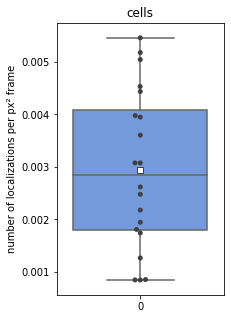

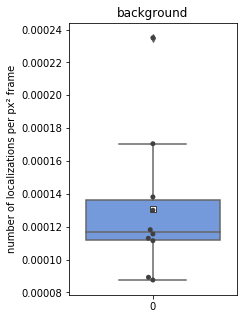

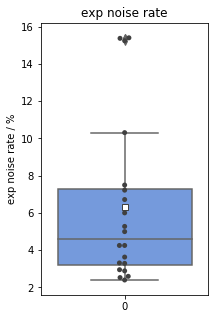

name: locs per px² frame, exp noise rate %:
Fab_CS2_cell01: 0.0008490689948234567, 15.408507226091528
Fab_CS2_cell02: 0.0008506469500924214, 15.379924351419902
Fab_CS2_cell03: 0.0008578362298418663, 15.25102961039452
Fab_CS2_cell04: 0.0012684049518254853, 10.31443918865079
Fab_CS2_cell05: 0.001744719792086094, 7.498559826930605
Fab_CS2_cell06: 0.001946903480668139, 6.719843008189452
Fab_CS2_cell07: 0.0018110303389956234, 7.224001420894539
Fab_CS2_cell08: 0.0026182806324110673, 4.996746941575934
Fab_CS2_cell09: 0.0024795573817175866, 5.276298842144561
Fab_CS2_cell10: 0.002179376386780334, 6.003040971511712
Fab_CS2_cell11: 0.0030761722651902164, 4.252975651016904
Fab_CS2_cell12: 0.0030761989775217073, 4.2529387200848525
Fab_CS2_cell13: 0.00360478475858057, 3.6293112122841573
Fab_CS2_cell14: 0.003976397470900991, 3.290135314169969
Fab_CS2_cell15: 0.003948160535117057, 3.313666104967441
Fab_CS2_cell16: 0.00517529407256983, 2.527950210893253
Fab_CS2_cell17: 0.004529943895968338, 2.888090016

In [6]:
exp_noise_rate = expNoiseRate.ExpNoiseRate()
display(widget_exp_noise_rate.run_button)
def run_analysis(event):
    widget_exp_noise_rate.create_clear_output()
    display(widget_exp_noise_rate.run_button)
    if not widget_exp_noise_rate.dir_box.value:
        print("Load cell localizations.")   
    if not widget_exp_noise_rate.dir_box_bg.value:
        print("Load background localizations.")
    if not widget_exp_noise_rate.roi_text_box.value:
        print("Load areas.")
    if widget_exp_noise_rate.roi_text_box.value and widget_exp_noise_rate.dir_box_bg.value and widget_exp_noise_rate.dir_box.value:
        exp_noise_rate.run_exp_noise_rate(widget_exp_noise_rate.dir_name, widget_exp_noise_rate.dir_name_bg, widget_exp_noise_rate.roi_path, widget_exp_noise_rate.determine_suffix(), int(widget_exp_noise_rate.background_size_box.value))
widget_exp_noise_rate.run_button.on_click(run_analysis)

## Save analysis
The results will be saved in two .txt files, the first with the cell names localization densities and exp noise rates, the second with the background names and localization densities. Optionally the plots can be saved as .pdf. Choose a directory and folder name.

In [7]:
display(widget_exp_noise_rate.box_foldername, widget_exp_noise_rate.dir_box_save, widget_exp_noise_rate.dir_button_save)
widget_exp_noise_rate.dir_button_save.on_click(widget_exp_noise_rate.open_dir_save)
widget_exp_noise_rate.dir_box_save.observe(widget_exp_noise_rate.change_dir_box_save)

Text(value='exp_noise_rate', description='Foldername', placeholder='name of folder', style=DescriptionStyle(de…

Text(value='', description='Directory', placeholder='Directory to save', style=DescriptionStyle(description_wi…

Button(description='browse', style=ButtonStyle(), tooltip='browse for directory')

In [8]:
display(widget_exp_noise_rate.save_fig_checkbox, widget_exp_noise_rate.save_button)
def save_analysis(event):
    widget_exp_noise_rate.create_clear_output()
    display(widget_exp_noise_rate.save_fig_checkbox, widget_exp_noise_rate.save_button)
    exp_noise_rate.save_results(widget_exp_noise_rate.dir_box_save.value, widget_exp_noise_rate.box_foldername.value, widget_exp_noise_rate.save_fig_checkbox.value)
    print("Results are saved.")
widget_exp_noise_rate.save_button.on_click(save_analysis)

Checkbox(value=True, description='Save plot')

Button(description='save', style=ButtonStyle(), tooltip='save the results')